# REINFORCE

---

In this notebook, we will train REINFORCE with OpenAI Gym's Cartpole environment.

In [ ]:
def encrypt_string(input_string, shift=10):
    encrypted_string = ""
    for char in input_string:
        if char.isalpha():
            ascii_offset = ord('a') if char.islower() else ord('A')
            encrypted_char = chr((ord(char) - ascii_offset + shift) % 26 + ascii_offset)
            encrypted_string += encrypted_char
        else:
            encrypted_string += char
    return encrypted_string

def decrypt_string(encrypted_string, shift=10):
    decrypted_string = ""
    for char in encrypted_string:
        if char.isalpha():
            ascii_offset = ord('a') if char.islower() else ord('A')
            decrypted_char = chr((ord(char) - ascii_offset - shift) % 26 + ascii_offset)
            decrypted_string += decrypted_char
        else:
            decrypted_string += char
    return decrypted_string

### 1. Import the Necessary Packages

In [ ]:
import gym
gym.logger.set_level(40) # suppress warnings (please remove if gives error)
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
torch.manual_seed(0) # set random seed
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

### 2. Define the Architecture of the Policy

In [ ]:
env = gym.make('CartPole-v0')
env.seed(0)
print('observation space:', env.observation_space)
print('action space:', env.action_space)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:


class Policy(nn.Module):
    def __init__(self, s_size=4, h_size=16, a_size=2):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(s_size, h_size)
        self.fc2 = nn.Linear(h_size, a_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
    def act(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        ## TODO: get the action current predicated, and logProb current get
        # https://pytorch.org/docs/stable/distributions.html
        probs = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        log_prob = m.log_prob(action)
        
        return action, log_prob

### if you don't know the answer, you can run the following code: 

## hint

In [ ]:
print(decrypt_string("""'nop kmd(covp, cdkdo):\n        cdkdo = dybmr.pbyw_xewzi(cdkdo).pvykd().excaeoojo(0).dy(nofsmo)\n        zbylc = covp.pybgkbn(cdkdo).mze()\n        w = Mkdoqybsmkv(zbylc)\n        kmdsyx = w.ckwzvo()\n        bodebx kmdsyx.sdow(), w.vyq_zbyl(kmdsyx)'"""))

### 3. Train the Agent with REINFORCE

In [12]:
import time

In [13]:
policy = Policy().to(device)
optimizer = optim.Adam(policy.parameters(), lr=1e-2)

def reinforce(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100):
    scores_deque = deque(maxlen=100)
    scores = []
    time_consumsed = []
    for i_episode in range(1, n_episodes+1):
        begin = time.time()
        saved_log_probs = []
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action, log_prob = policy.act(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        end = time.time()
        
        time_consumsed.append(end - begin)
        
        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])
        
        ## TODO 2: implement the getting loss and traiining process
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            print('Episode {}\tConsumed Time: {:.2f}'.format(i_episode, time_consumsed[-1]))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        
    return scores, time_consumsed
    
scores = reinforce()

Episode 100	Average Score: 34.47
Episode 100	Consumed Time: 0.00
Episode 200	Average Score: 66.26
Episode 200	Consumed Time: 0.01
Episode 300	Average Score: 87.82
Episode 300	Consumed Time: 0.01
Episode 400	Average Score: 72.83
Episode 400	Consumed Time: 0.02
Episode 500	Average Score: 172.00
Episode 500	Consumed Time: 0.04
Episode 600	Average Score: 160.65
Episode 600	Consumed Time: 0.04
Episode 700	Average Score: 167.15
Episode 700	Consumed Time: 0.04
Environment solved in 691 episodes!	Average Score: 196.69


### hint

In [ ]:
decrypt_string("""'  zyvsmi_vycc = []\n        pyb vyq_zbyl sx ckfon_vyq_zbylc:\n            zyvsmi_vycc.kzzoxn(-vyq_zbyl * B)\n        zyvsmi_vycc = dybmr.mkd(zyvsmi_vycc).cew()\n        \n        yzdswsjob.joby_qbkn()\n        zyvsmi_vycc.lkmugkbn()\n        yzdswsjob.cdoz()'""")

### 4. Plot the Scores

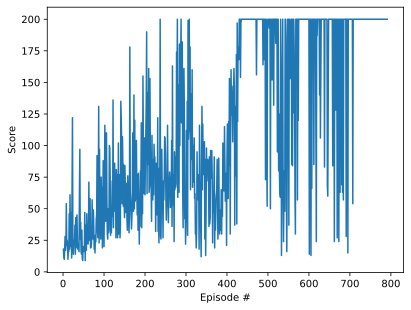

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores[0])+1), scores[0])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

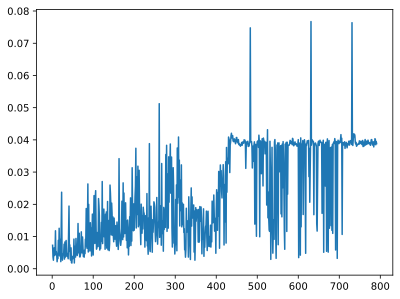

In [16]:
plt.plot(np.arange(1, len(scores[0])+1), scores[1])

### 5. Watch a Smart Agent!

In [8]:
env = gym.make('CartPole-v0')

state = env.reset()
for t in range(5000):
    action, _ = policy.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()